# Gradient Descent and Linear Regression

In this notebook we use gradient descent and linear regression to fit a straight line to some synthetic data. We will plot the cost against the iteration number and explore how things change when using different learning rates. 

First import the necessary libraries.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import math

Now we generate some synthetic training data with a linear correlation to train on:

In [3]:
x_t = np.arange(0, 11, 1) #Generates array of x values from 0-10

g = 2.3                 #g is the true slope
c = 0.2                 #c is the true y-intercept

y_t = g*x_t + c             #y is generated from x, g and c

print(x_t)
print(y_t)

[ 0  1  2  3  4  5  6  7  8  9 10]
[ 0.2  2.5  4.8  7.1  9.4 11.7 14.  16.3 18.6 20.9 23.2]


We now want to see if we can use gradient descent to fit a linear model to this data so we can correctly predict the value of y for any given x. 

The linear model we will use is: 

$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

For a perfectly fitting model we should end up with w=g and b=c.

The overall cost, J,  of our training samples is given by:

$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$

The following function calculates this value given our input data, w and b:

In [4]:
def cost(x, y, w, b):

    m = len(x)    #This is the number of training examples we have
        
    f_arr = w*x + b  #The output values of our model for each sample
    cost_arr = (f_arr - y)**2  #The cost for each sample
        
    cost = (1/2*m) * np.sum(cost_arr)  #The total cost value is divided by 2 times the size of the data set
    
    return cost
    

Now we will use gradient descent to find the values of w and b which minimise the cost function. In gradient descent, we carry out the following operations untile we reach convergence, updating w and b simultaneously:

$$\begin{align*} \; \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline
\end{align*}$$

where $\alpha$ is the learning rate.

The partial derivatives of J with respect to w and b are the following:

$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

The following function calculates the gradient for a given training sample:

In [5]:
def gradient(x, y, w, b):
    
    m = len(x)
    dJdw = 0  #partial deriviative with respect to w
    dJdb = 0  #partial deriviative with respect to b

    f_arr = w*x + b
    dJdw = (f_arr - y)*x
    dJdb = f_arr - y
        
    dJdw = (1/m) * np.sum(dJdw)
    dJdb = (1/m) * np.sum(dJdb)
    
    return dJdw, dJdb

To test the above function we can input the correct values of w and b which we know because we used them to generate the data. The gradients should be equal to 0.

In [8]:
dJdw, dJdb = gradient(x_t, y_t, g, c)

print('dJdw:', dJdw, 'dJdb:', dJdb)

dJdw: 0.0 dJdb: 0.0


Now we can implement gradient descent:

In [9]:
def grad_descent(x, y, w_in, b_in, alpha, n, cost, gradient):
    
    J_hist = []    #Stores J values for plotting
    wb_hist = []   #Stores w and b values for plotting
    
    w = w_in #initialise w and b
    b = b_in
    
    for i in range(n):  #n is the number of iterations
        
        #Calculate the gradients
        dJdw, dJdb = gradient(x, y, w, b)
        
        #update w and b
        w -= alpha*dJdw
        b -= alpha*dJdb
        
        #Save cost values and w,b values for plotting, with limit on no. of iterations saved
        if i < 100000:
            J = cost(x, y, w, b)
            J_hist.append(J)
            wb_hist.append([w,b])
        
        # Print cost 10 times at equal intervals, or as many iterations if < 10
        if i% math.ceil(n/10) == 0:
            print(f"Iteration {i:4}: Cost {J_hist[-1]:0.2e} ",
                  f"dj_dw: {dJdw: 0.3e}, dj_db: {dJdb: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
            
    return w, b, J_hist, wb_hist

Now we will run the gradient descent function:

In [10]:
#Initialise params
w_in = -10
b_in = 75

#Set number of iterations, n, and learning rate, alpha
n = 10000
alpha = 0.05

#run gradient descent!
w_f, b_f, J_hist, wb_hist = grad_descent(x_t, y_t, w_in, b_in, alpha, n, cost, gradient)

print(f'Final parameters: w = {w_f:0.3e}, b = {b_f:0.5e}')

Iteration    0: Cost 9.76e+04  dj_dw: -5.650e+01, dj_db:  1.330e+01   w: -7.175e+00, b: 7.43350e+01
Iteration 1000: Cost 5.39e-08  dj_dw: -2.283e-06, dj_db:  1.585e-05   w:  2.300e+00, b: 2.00056e-01
Iteration 2000: Cost 3.07e-20  dj_dw: -1.723e-12, dj_db:  1.197e-11   w:  2.300e+00, b: 2.00000e-01
Iteration 3000: Cost 1.25e-28  dj_dw: -3.512e-15, dj_db: -2.776e-17   w:  2.300e+00, b: 2.00000e-01
Iteration 4000: Cost 1.25e-28  dj_dw: -3.512e-15, dj_db: -2.776e-17   w:  2.300e+00, b: 2.00000e-01
Iteration 5000: Cost 1.25e-28  dj_dw: -3.512e-15, dj_db: -2.776e-17   w:  2.300e+00, b: 2.00000e-01
Iteration 6000: Cost 1.25e-28  dj_dw: -3.512e-15, dj_db: -2.776e-17   w:  2.300e+00, b: 2.00000e-01
Iteration 7000: Cost 1.25e-28  dj_dw: -3.512e-15, dj_db: -2.776e-17   w:  2.300e+00, b: 2.00000e-01
Iteration 8000: Cost 1.25e-28  dj_dw: -3.512e-15, dj_db: -2.776e-17   w:  2.300e+00, b: 2.00000e-01
Iteration 9000: Cost 1.25e-28  dj_dw: -3.512e-15, dj_db: -2.776e-17   w:  2.300e+00, b: 2.00000e-01


Setting n = 10000 and alpha = 0.01 produces exact matches to the true values of w and b (g and c). Changing the input values appears to makes little difference. Lowering alpha leads to w and b taking longer to converge, increasing alpha to greater than 0.05 makes it impossible for the values to converge.

In the following cell we will plot how J varied with each iteration.

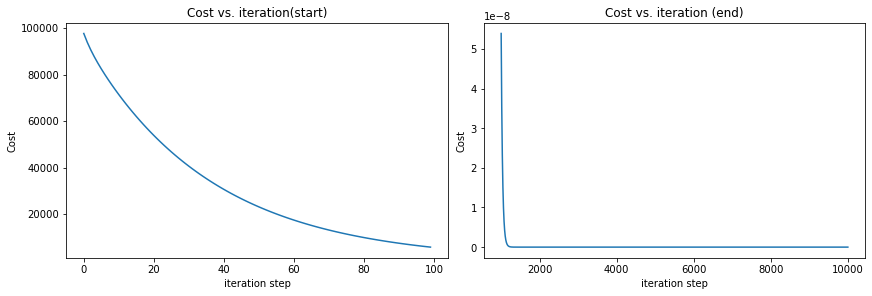

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

The following cell plots the progress of gradient descent over a contour plot.

Text(0.5, 1.0, 'Contour plot of cost J(w,b), vs b,w with path of gradient descent')

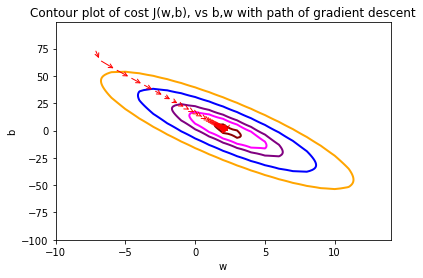

In [13]:
w_range =[-10, 15, 1]
b_range=[-100, 100, 1]
contours = [0.1,50,1000,5000,10000,25000,50000]
step = 10
resolution = 5

#This section plots the contours
b0,w0 = np.meshgrid(np.arange(*b_range),np.arange(*w_range))
z=np.zeros_like(b0)

for i in range(w0.shape[0]):
    for j in range(w0.shape[1]):
        z[i][j] = cost(x_t, y_t, w0[i][j], b0[i][j] )

plt.contour(w0, b0, z, contours, linewidths=2,
                   colors=['blue', 'orange', 'darkred', 'magenta', 'purple'])

#This section plots the progression of the gradient descent
base = wb_hist[0] #starting point for the progress track
xlow, xhigh = plt.xlim()
ylow, yhigh = plt.ylim()

for point in wb_hist[0::step]:
    ax, ay = point
    bx, by = base
    if (ax > xlow and ax < xhigh) and (bx > xlow and bx < xhigh) \
    and (ay > ylow and ay < yhigh) and (by > ylow and by < yhigh):
        plt.annotate('', xy=point, xytext=base, xycoords='data',
                         arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                         va='center', ha='center')
    base=point

#Plot and axis titles
plt.xlabel("w");  plt.ylabel("b")
plt.title('Contour plot of cost J(w,b), vs b,w with path of gradient descent')